# E-commerce Sales Analysis

## Connect the colab with Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [2]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
#reading datasets
details = pd.read_csv('/content/drive/MyDrive/Ecommerce-Sales-Analysis/Details.csv')
orders = pd.read_csv('/content/drive/MyDrive/Ecommerce-Sales-Analysis/Orders.csv')

In [5]:
print("Orders Data:")
display(orders.head())

Orders Data:


,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [6]:
print("Details Data:")
display(details.head())

Details Data:


,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


## Data Cleaning & Preparation

In [7]:
orders.columns = orders.columns.str.strip()
details.columns = details.columns.str.strip()

In [8]:
# Convert Order Date
orders['Order Date'] = pd.to_datetime(orders['Order Date'], errors='coerce', dayfirst=True)

In [9]:
# Merge
df = details.merge(orders, on="Order ID", how="left")

In [10]:
# Drop missing dates
df = df.dropna(subset=['Order Date'])

In [11]:
# Ensure numeric
for col in ['Amount','Profit','Quantity']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=['Amount','Profit','Quantity'])

In [12]:
# Add time features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()
df['Quarter'] = df['Order Date'].dt.to_period('Q').astype(str)
df['DayOfWeek'] = df['Order Date'].dt.day_name()

print("✅ Cleaned dataset:")
df.head()

✅ Cleaned dataset:


,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year,Month,Quarter,DayOfWeek
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,2018-06-04,Bhawna,Madhya Pradesh,Indore,2018,2018-06-01,2018Q2,Monday
1,B-26055,5729,64,14,Furniture,Chairs,EMI,2018-03-10,Harivansh,Uttar Pradesh,Mathura,2018,2018-03-01,2018Q1,Saturday
2,B-25955,2927,146,8,Furniture,Bookcases,EMI,2018-01-16,Shiva,Maharashtra,Pune,2018,2018-01-01,2018Q1,Tuesday
3,B-26093,2847,712,8,Electronics,Printers,Credit Card,2018-03-27,Sarita,Maharashtra,Pune,2018,2018-03-01,2018Q1,Tuesday
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card,2018-04-01,Vrinda,Maharashtra,Pune,2018,2018-04-01,2018Q2,Sunday


## Exploratory Data Analysis

In [13]:
# Dataset Overview
print("Shape:", df.shape)
print("\nMissing values per column:\n", df.isna().sum())
print("\nColumn data types:\n", df.dtypes)
print("\nUnique values per column:\n", df.nunique())

Shape: (1500, 15)

Missing values per column:
 Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year            0
Month           0
Quarter         0
DayOfWeek       0
dtype: int64

Column data types:
 Order ID                object
Amount                   int64
Profit                   int64
Quantity                 int64
Category                object
Sub-Category            object
PaymentMode             object
Order Date      datetime64[ns]
CustomerName            object
State                   object
City                    object
Year                     int32
Month           datetime64[ns]
Quarter                 object
DayOfWeek               object
dtype: object

Unique values per column:
 Order ID        500
Amount          590
Profit          406
Quantity         14
Category          3
Sub-Category     17
PaymentMode       5
Or

In [14]:
# Descriptive Statistics
print("\nSummary Statistics:")
display(df[['Amount','Profit','Quantity']].describe())


Summary Statistics:


,Amount,Profit,Quantity
count,1500.000000,1500.00000,1500.000000
mean,291.847333,24.64200,3.743333
std,461.924620,168.55881,2.184942
min,4.000000,-1981.00000,1.000000
25%,47.750000,-12.00000,2.000000
50%,122.000000,8.00000,3.000000
75%,326.250000,38.00000,5.000000
max,5729.000000,1864.00000,14.000000


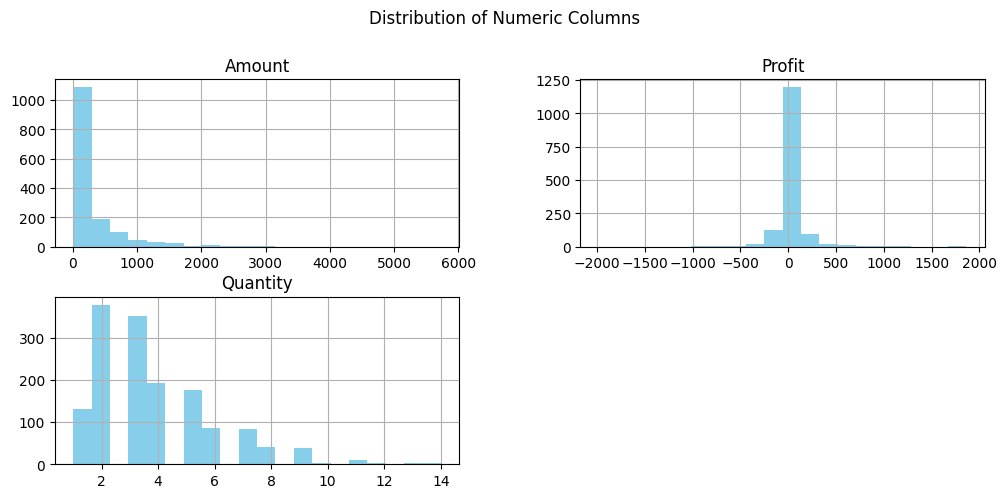

In [16]:
# Numeric Distributions
num_cols = ['Amount','Profit','Quantity']

df[num_cols].hist(bins=20, figsize=(12,5), color="skyblue")
plt.suptitle("Distribution of Numeric Columns", y=1.02)
plt.show()

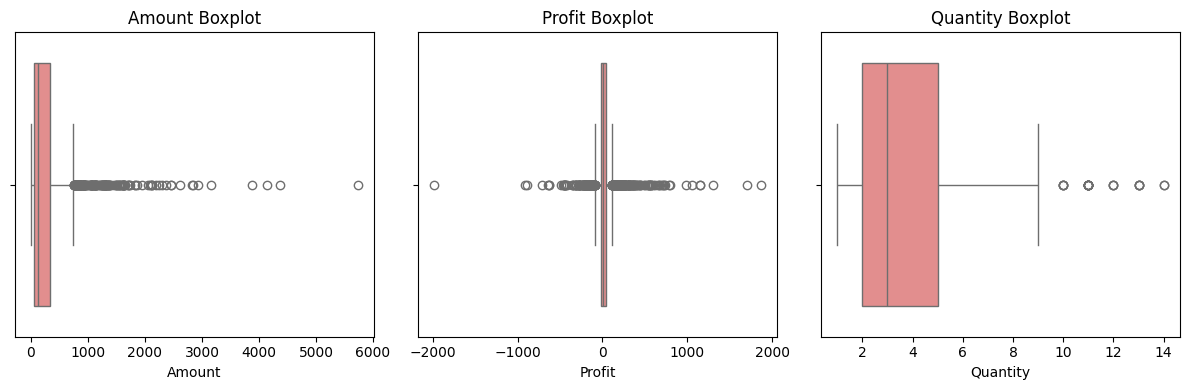

In [17]:
# Boxplots
plt.figure(figsize=(12,4))
for i, col in enumerate(num_cols,1):
    plt.subplot(1,3,i)
    sns.boxplot(x=df[col], color="lightcoral")
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1524919122.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


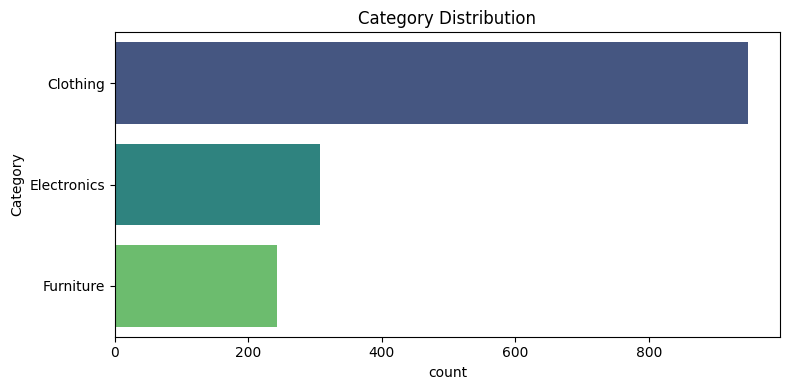

/tmp/ipython-input-1524919122.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


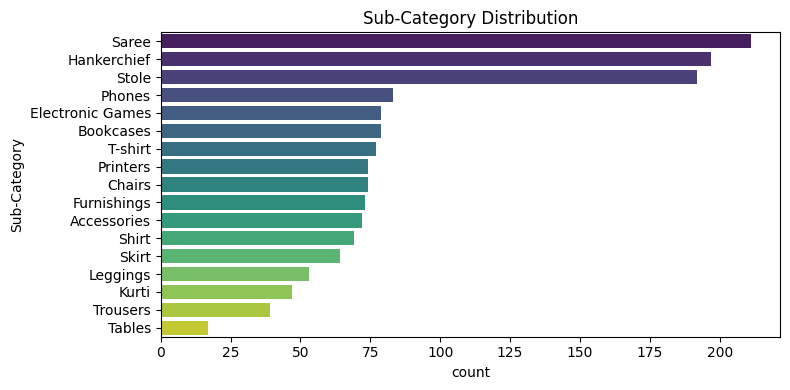

/tmp/ipython-input-1524919122.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


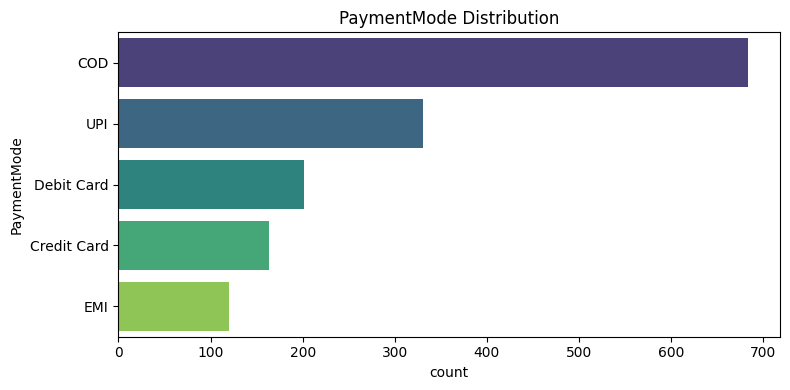

/tmp/ipython-input-1524919122.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


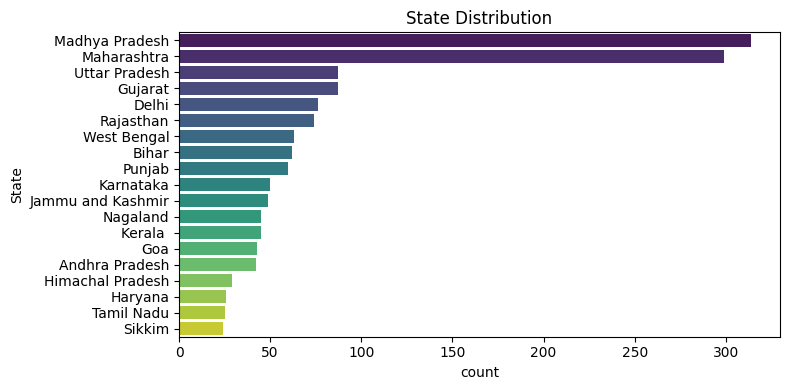

In [18]:
# Categorical Distributions
cat_cols = ['Category','Sub-Category','PaymentMode','State']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.title(f"{col} Distribution")
    plt.tight_layout()
    plt.show()

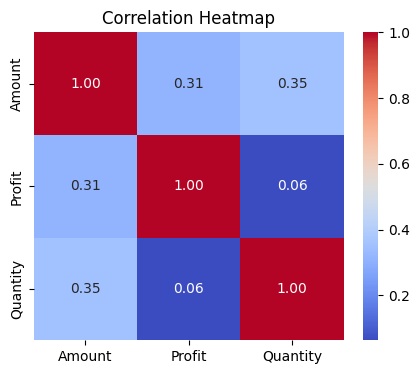

In [19]:
# Correlation Heatmap
corr = df[['Amount','Profit','Quantity']].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

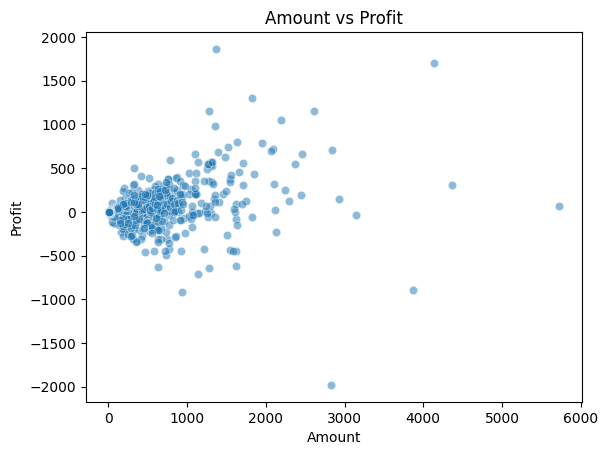

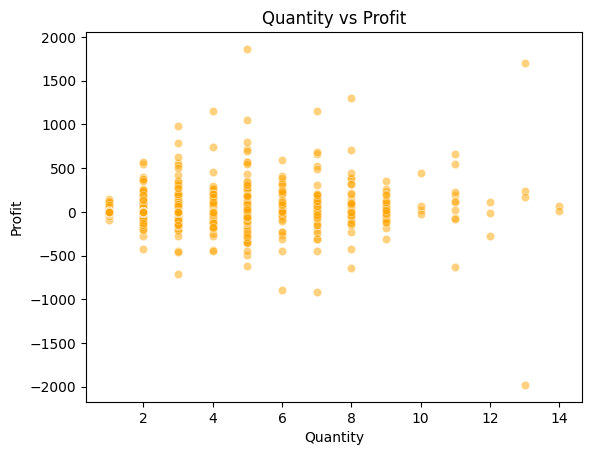

In [20]:
# Scatterplots
plt.figure()
sns.scatterplot(x='Amount', y='Profit', data=df, alpha=0.5)
plt.title("Amount vs Profit")
plt.show()

plt.figure()
sns.scatterplot(x='Quantity', y='Profit', data=df, alpha=0.5, color="orange")
plt.title("Quantity vs Profit")
plt.show()

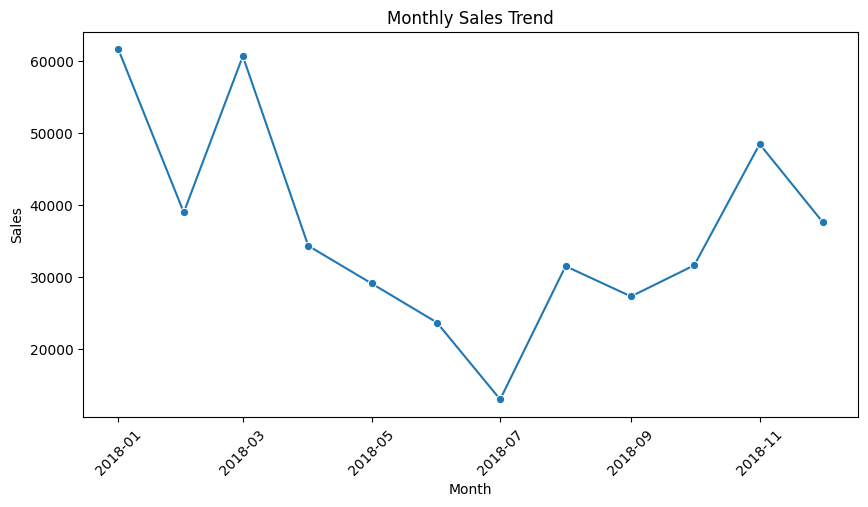

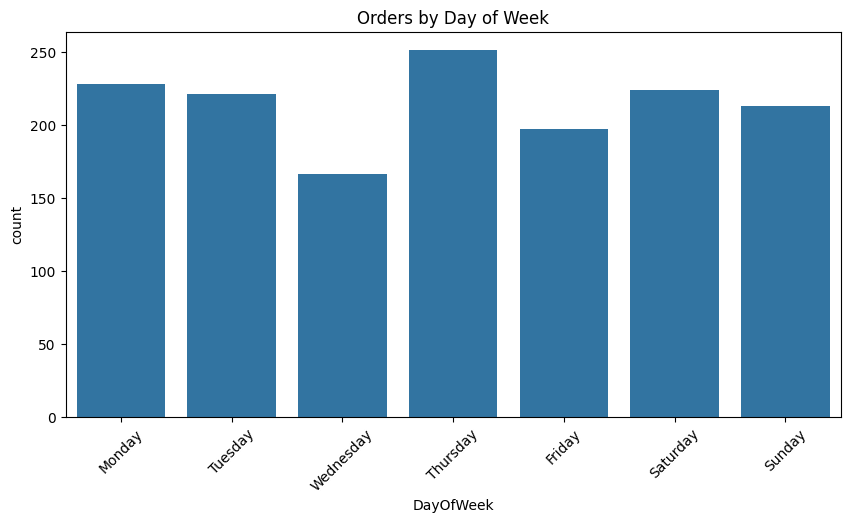

In [21]:
# Time-based Analysis
monthly = df.groupby('Month').agg(Sales=('Amount','sum'), Profit=('Profit','sum')).reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='Sales', data=monthly, marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='DayOfWeek', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Orders by Day of Week")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2359695272.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette="mako")


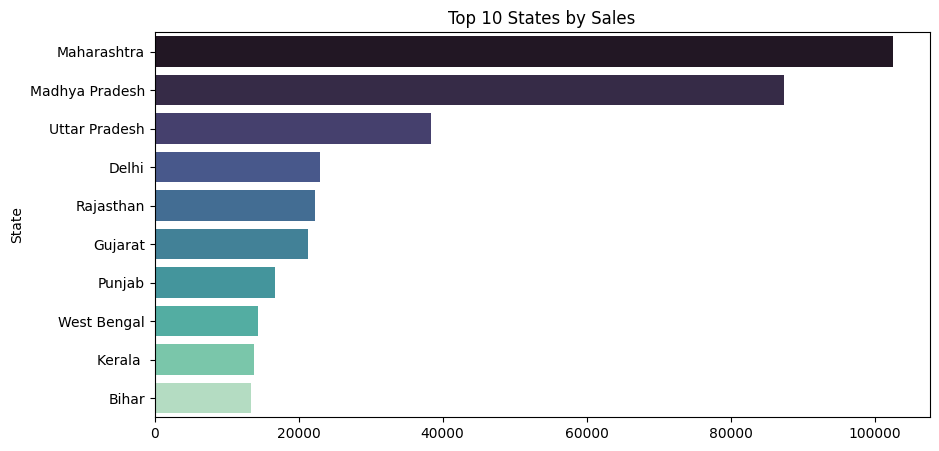

/tmp/ipython-input-2359695272.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette="rocket")


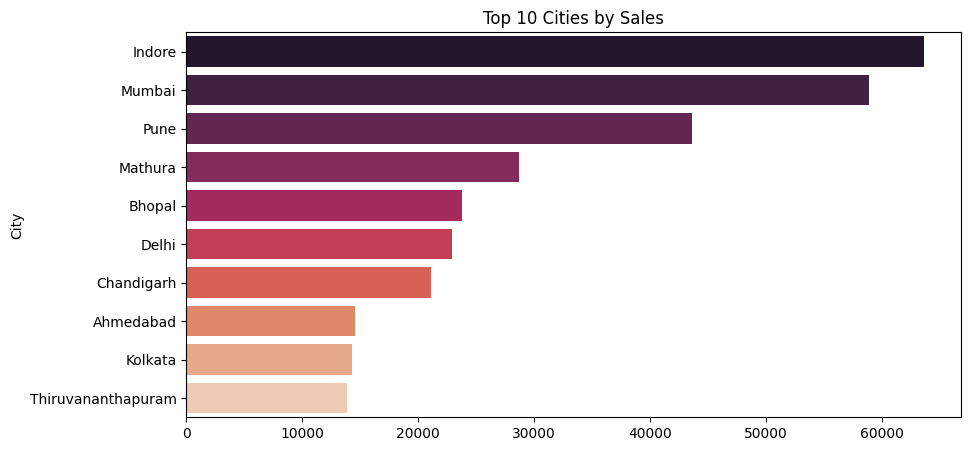

In [22]:
# Geographic Insights
state_sales = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
city_sales = df.groupby('City')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=state_sales.values, y=state_sales.index, palette="mako")
plt.title("Top 10 States by Sales")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=city_sales.values, y=city_sales.index, palette="rocket")
plt.title("Top 10 Cities by Sales")
plt.show()

/tmp/ipython-input-2268137228.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_sales.values, y=customer_sales.index, palette="Blues_r")


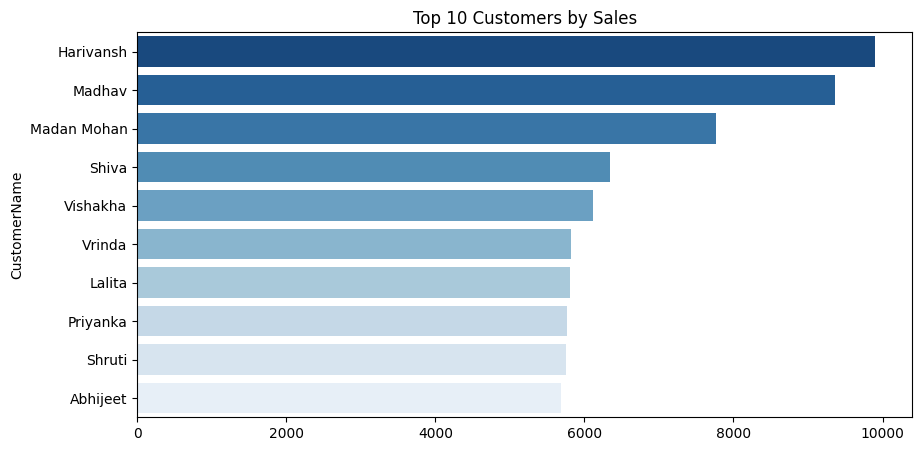

In [23]:
# Customer Insights
customer_sales = df.groupby('CustomerName')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=customer_sales.values, y=customer_sales.index, palette="Blues_r")
plt.title("Top 10 Customers by Sales")
plt.show()

## KPI Analysis

In [24]:
print("\n📊 Key Metrics:")
total_sales = df['Amount'].sum()
total_profit = df['Profit'].sum()
num_orders = df['Order ID'].nunique()
num_customers = df['CustomerName'].nunique()
avg_order_value = df.groupby('Order ID')['Amount'].sum().mean()
profit_margin = total_profit / total_sales

print(f"Total Sales: {total_sales:,.2f}")
print(f"Total Profit: {total_profit:,.2f}")
print(f"Number of Orders: {num_orders}")
print(f"Unique Customers: {num_customers}")
print(f"Average Order Value: {avg_order_value:,.2f}")
print(f"Profit Margin: {profit_margin:.2%}")


📊 Key Metrics:
Total Sales: 437,771.00
Total Profit: 36,963.00
Number of Orders: 500
Unique Customers: 336
Average Order Value: 875.54
Profit Margin: 8.44%


## Insights & Conclusion

1. Sales show monthly and seasonal variations.
2. Certain categories and sub-categories dominate sales.
3. A few states and cities contribute the most revenue.
4. Payment mode preferences vary, with some dominating.
5. Top customers account for a large share of revenue.
6. Profit margin indicates efficiency of sales operations.